In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Read data
# Change to data path on your computer
with open('peritoneum.txt') as f:
    lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
    splitted = line.replace('\n', '').split(' ')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    y_data.append(splitted[5])
    x_data.append([splitted[0], splitted[1], splitted[2], splitted[3], splitted[4]])

x_data = np.asarray(x_data)
y_data = np.asarray(y_data)
data_len = len(x_data)

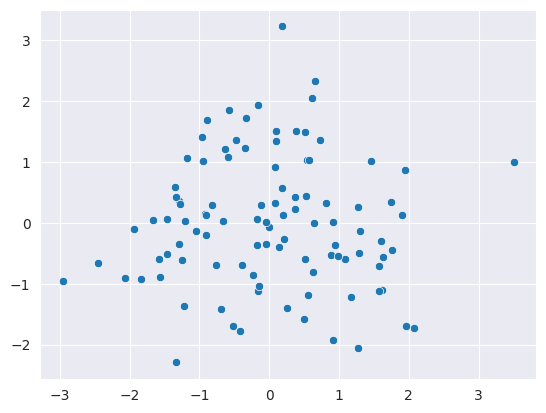

In [3]:
# Normalize data
x_data = StandardScaler().fit_transform(x_data)

# Dimensionality reduction using PCA
pca = PCA(n_components=2, random_state=42)
x_data_pca = pca.fit_transform(x_data)

# Data visualization
pc1 = x_data_pca[:, 0]
pc2 = x_data_pca[:, 1]
sns.scatterplot(x=pc1, y=pc2)
plt.show()

In [4]:
# Split training set and validation set for original data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size=0.2, random_state=42)
# Split training set and validation set for dimensionality reduction data
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_data_pca, y_data,
                                                                    test_size=0.2, random_state=42)

In [5]:
# Linear Regression method
def linear_regression_approach(x_train, x_test, y_train, y_test):
    linear_reg = LinearRegression()
    linear_reg.fit(x_train, y_train)
    y_pred = linear_reg.predict(x_test)
    print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
    print(f'R-squared error: {r2_score(y_test, y_pred)}')

In [6]:
# Print the result
# Original data
print(f'Original data: ')
linear_regression_approach(x_train, x_test, y_train, y_test)
# Dimensionality reduction data
print(f'\nDimensionality reduction data: ')
linear_regression_approach(x_train_pca, x_test_pca, y_train_pca, y_test_pca)

Original data: 
Mean Absolute Error: 0.24253680178241108
Mean Squared Error: 0.17851473088966155
R-squared error: 0.23209149234182425

Dimensionality reduction data: 
Mean Absolute Error: 0.26689807438146085
Mean Squared Error: 0.1939879491594482
R-squared error: 0.16553106961925768


- Độ đo R-squared của hướng tiếp cận giảm chiều dữ liệu rồi mới thực hiện Linear Regression thấp hơn đáng kể so với hướng tiếp cận thực hiện Linear Regression trên tập dữ liệu gốc. Có thể nói phương pháp Linear Regression đối với bài toán này không phù hợp. Việc giảm chiều dữ liệu càng khiến mô hình Linear Regression không phù hợp với bài toán này.
- Các độ đo MAE, MSE của hướng tiếp cận giảm chiều dữ liệu rồi mới thực hiện Linear Regression đều cao hơn so với hướng tiếp cận thực hiện Linear Regression trên tập dữ liệu gốc. Do đó, đối với bài toán này, việc giảm chiều dữ liệu rồi thực hiện Linear Regression cho kết quả dự báo tệ hơn thực hiện Linear Regression trên tập dữ liệu gốc.
